# Proyecto: Análisis Exploratorio de los Datos y preparación de un DataSet. 

## Nombre del estudiante: ALAN OMAR TAPIA CERVANTES
## Número de control: 19120243
## Materia/Grupo: A

El siguiente proyecto tomará como set de datos un conjunto de información sobre los precios de las casas.
El set de datos tiene datos nulos, datos tipo objeto, anomalías, inconsistencias, por lo que es necesario conocimientos previos de EDA para poder prepararlo.
El objetivo es preparar un set de datos para poder usarlo posteriormente en un modelo de ML, no basta con solo volverlo numérico, necesitamos tener conocimientos sobre los datos mismos.
El resultado de esta exploración debe ser:
1. Gráficas y conclusiones acerca de los datos.
2. Eliminación de datos nulos, anomalías e inconsistencias.
3. Generación de un dataframe listo para usarse sobre un modelo de ML (numérico), con las variables, cuya correlación es más fuerte con la variable objetivo, identificadas.


## Análisis y exploración.

### Paso 1: Importar las librerías que se van a utilizar y mostrar las primeras y últimas 5 filas del dataset.

In [1]:
# Espacio para realizar la importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ubicacionArchivo = "casas_dataset.csv"
# Carga de un CSV a un archivo tipo DataFrame por medio de pandas.
df = pd.read_csv(ubicacionArchivo)

In [5]:
#vizualizamos los datos
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Paso 2: Mostrar información sobre el dataset, qué tipos son, cuántos nulos hay, datos estadísticos.

In [3]:
# Mostramos la informacion del dataSet
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Contabilizamos los valores nulos por columna
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
# sacamos los datos estadisticos de las variables numericas
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

### Paso 3: Mostrar información sobre las variables "objeto" y revisar si se pueden categorizar (todavía no se categorizan, solo se exploran).

In [20]:
#mostramos las variaciones de datos en cada columna para una posible categorización
for col in df:
    print("valores",col,df[col].nunique())

valores Id 1460
valores MSSubClass 15
valores MSZoning 5
valores LotFrontage 110
valores LotArea 1073
valores Street 2
valores Alley 2
valores LotShape 4
valores LandContour 4
valores Utilities 2
valores LotConfig 5
valores LandSlope 3
valores Neighborhood 25
valores Condition1 9
valores Condition2 8
valores BldgType 5
valores HouseStyle 8
valores OverallQual 10
valores OverallCond 9
valores YearBuilt 112
valores YearRemodAdd 61
valores RoofStyle 6
valores RoofMatl 8
valores Exterior1st 15
valores Exterior2nd 16
valores MasVnrType 3
valores MasVnrArea 327
valores ExterQual 4
valores ExterCond 5
valores Foundation 6
valores BsmtQual 4
valores BsmtCond 4
valores BsmtExposure 4
valores BsmtFinType1 6
valores BsmtFinSF1 637
valores BsmtFinType2 6
valores BsmtFinSF2 144
valores BsmtUnfSF 780
valores TotalBsmtSF 721
valores Heating 6
valores HeatingQC 5
valores CentralAir 2
valores Electrical 5
valores 1stFlrSF 753
valores 2ndFlrSF 417
valores LowQualFinSF 24
valores GrLivArea 861
valores Bs

    # POSIBLES CATEGORIAS

Analizando el resultado anterior nos peratamos que hay muchas columnas con variacion en sus datos menores a 10
por lo que hacerlas categoricas nos ayudaria bastante en la limpieza de nuestro dataSet. 

### Paso 4: Mostrar información sobre las correlaciones (variables numéricas), la variable/columna objetivo es "SalePrice".

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

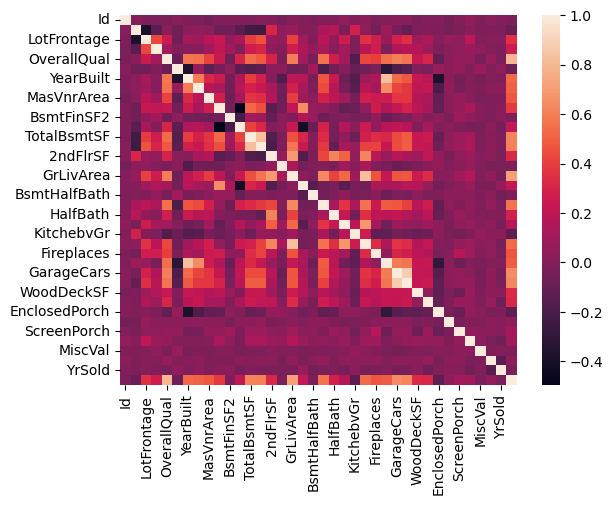

In [43]:
#Diagrama de la matriz de correlaciones y nuevo df_numerico para tener un mejor resultado en el diagrama
df.corr(numeric_only=True)
df_numerico = df.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr())
print(df.corr(numeric_only=True))

### Paso 5: Muestra de gráficas de las variables numéricas y categóricas. 
Puede ser boxplot para las numéricas y de conteo/histograma para las categóricas.

## Tratamiento de los datos.

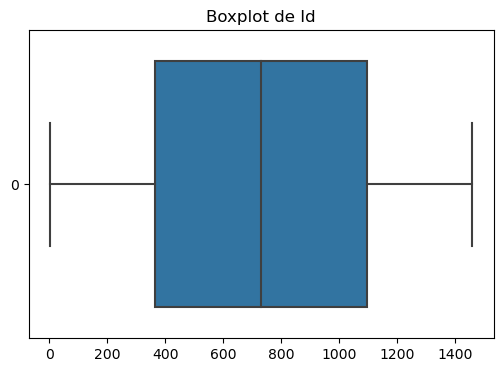

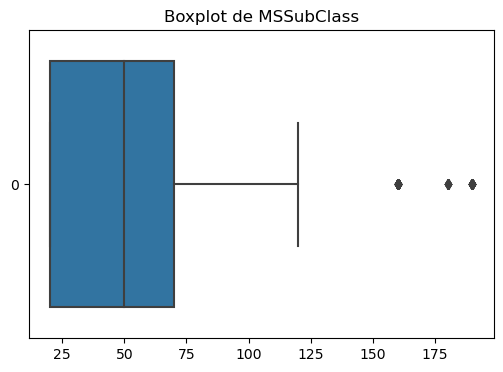

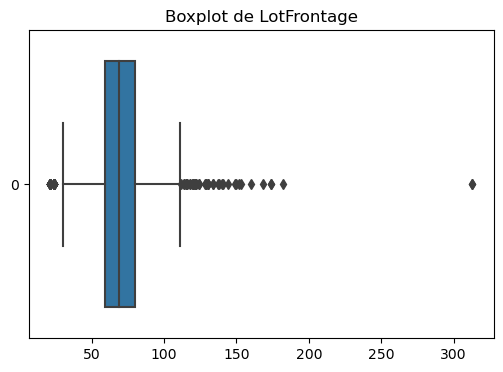

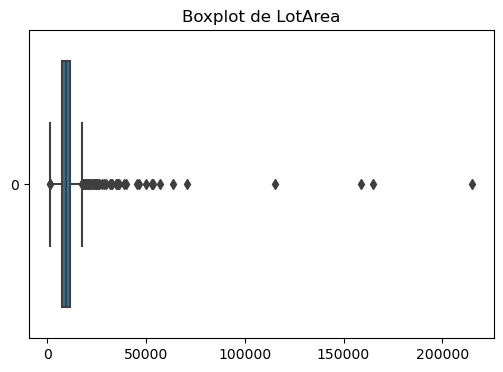

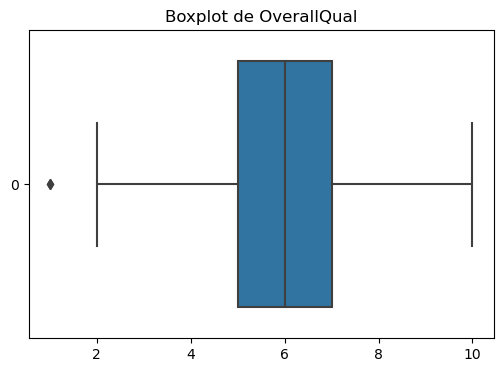

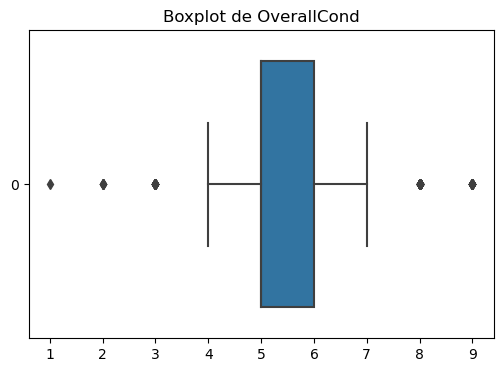

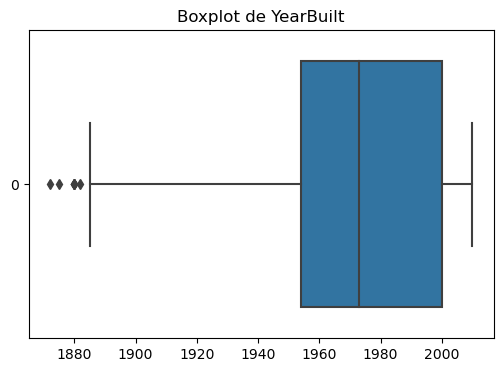

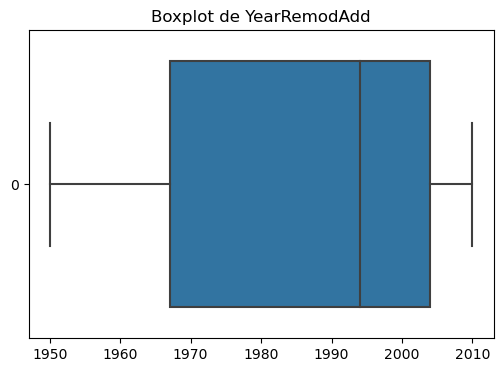

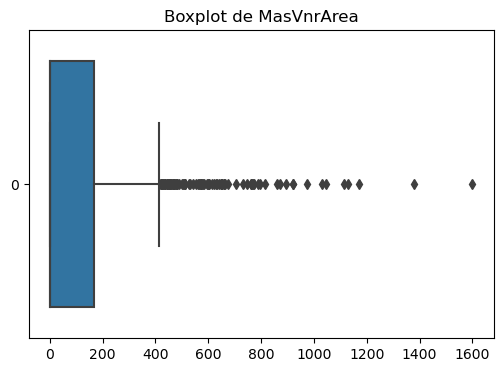

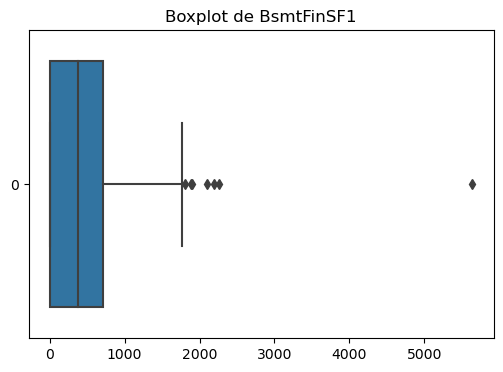

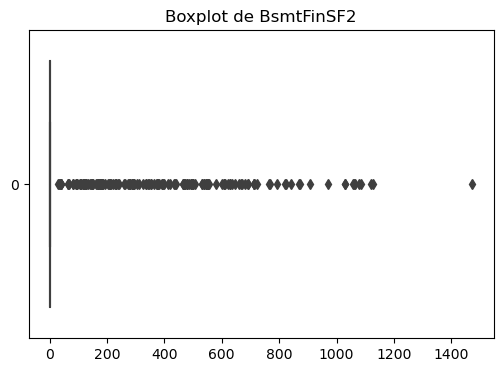

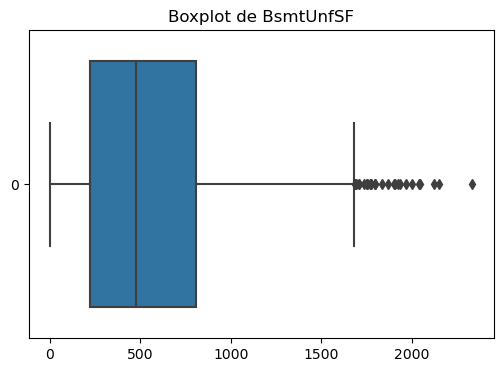

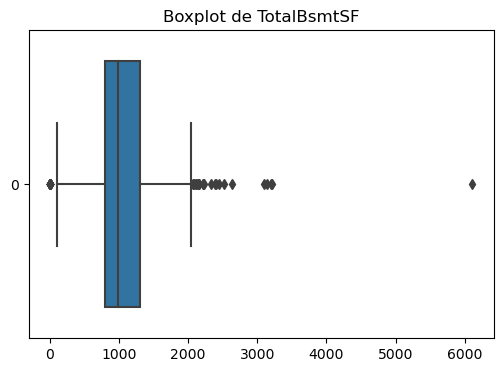

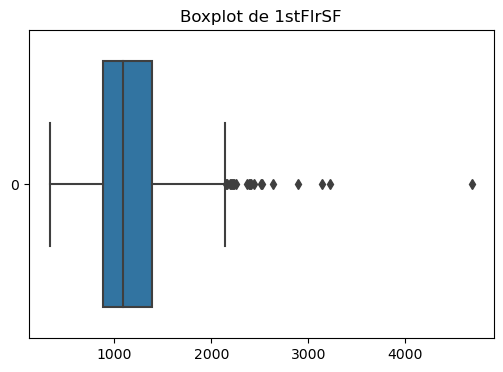

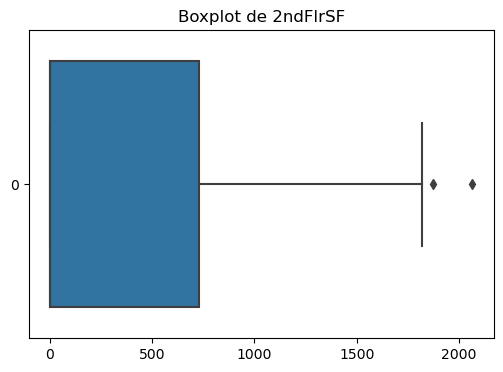

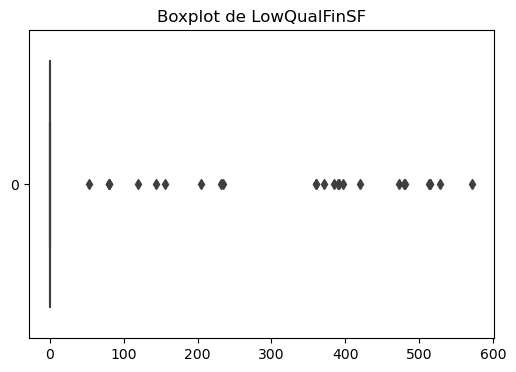

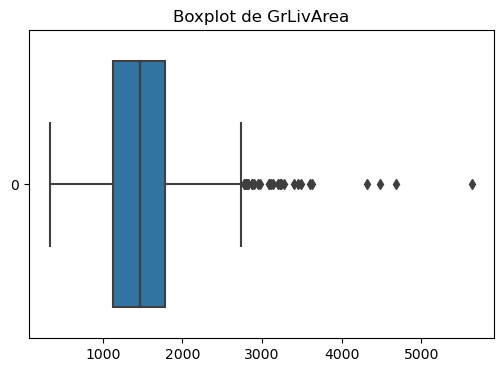

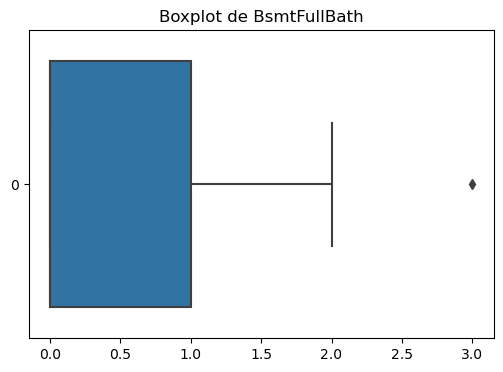

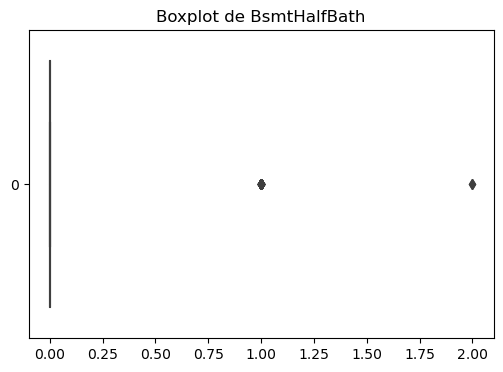

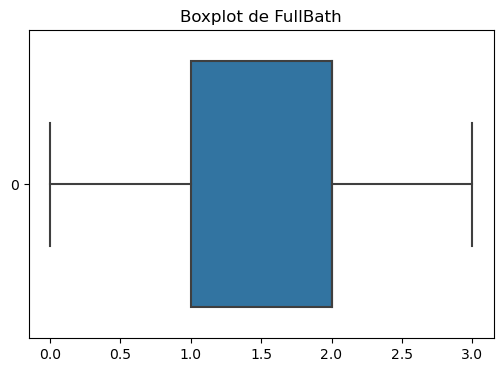

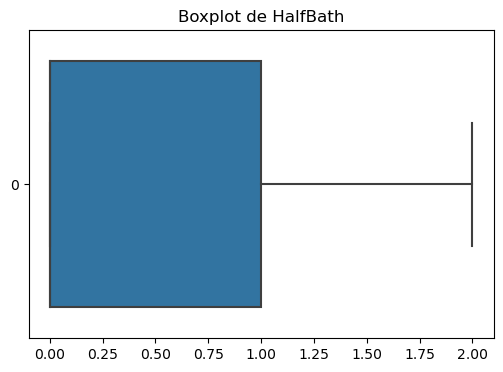

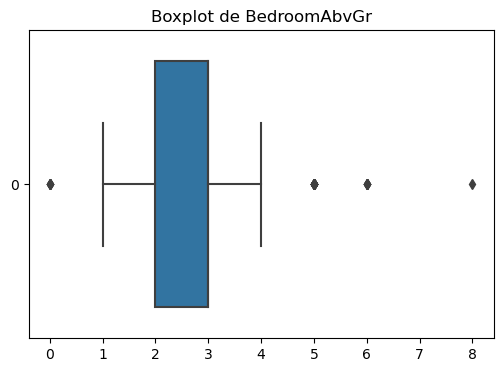

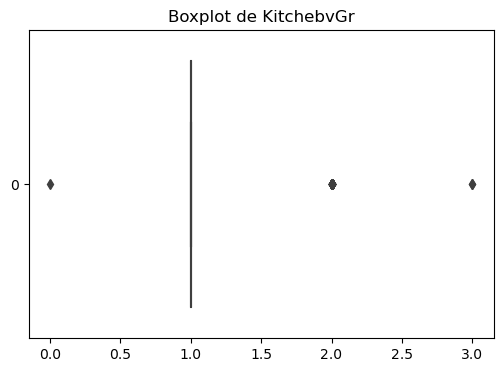

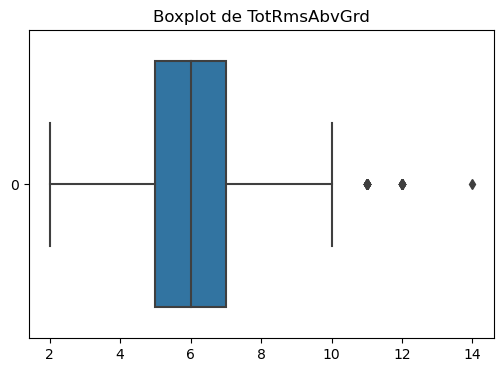

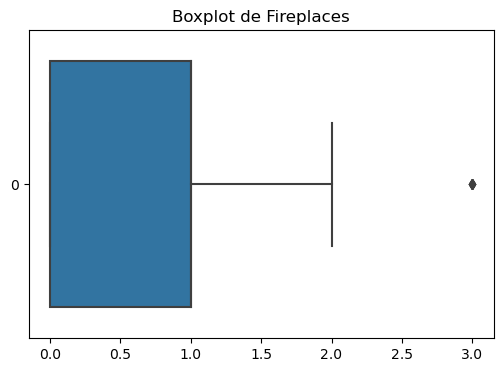

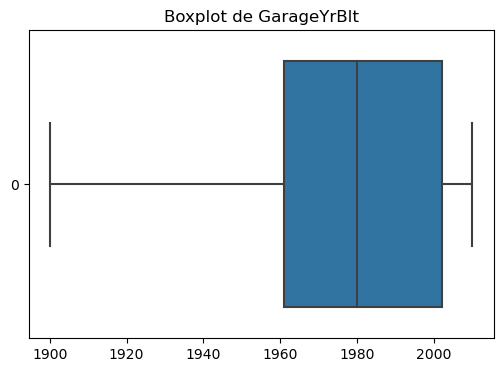

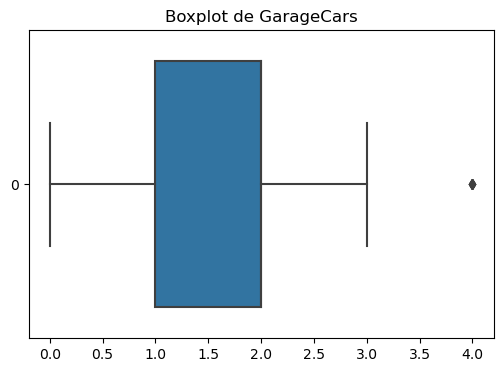

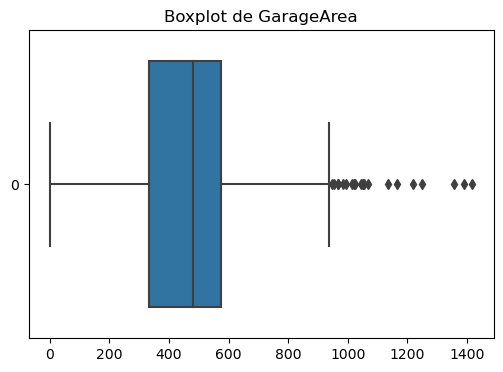

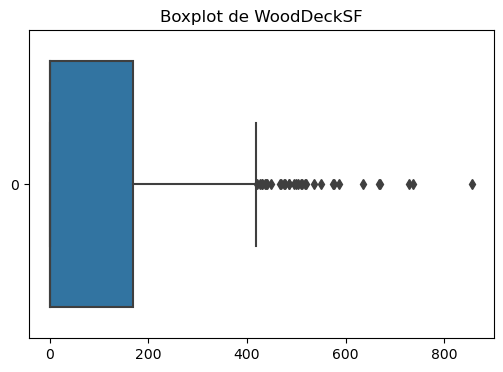

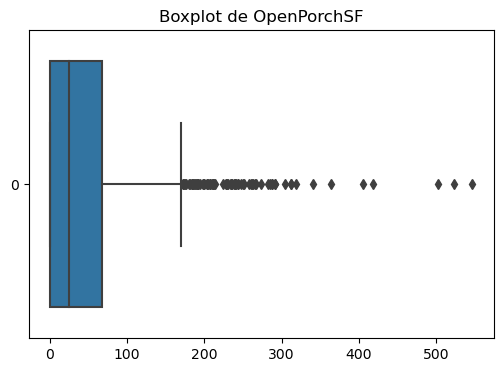

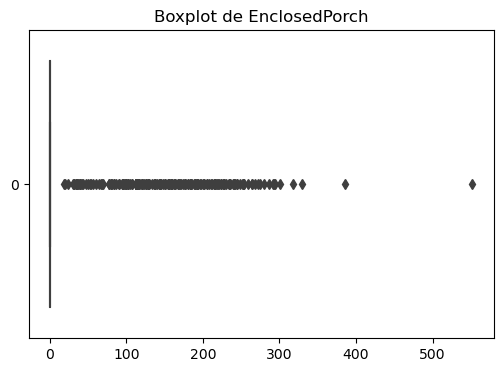

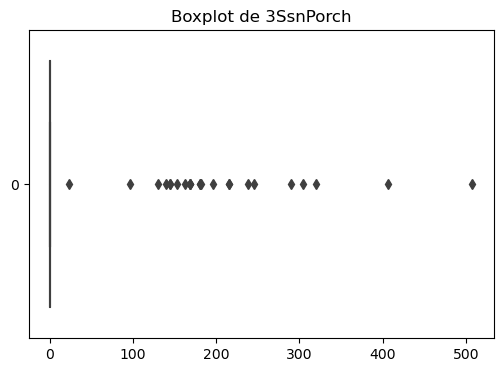

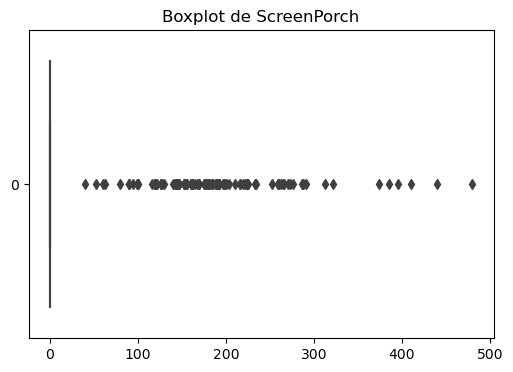

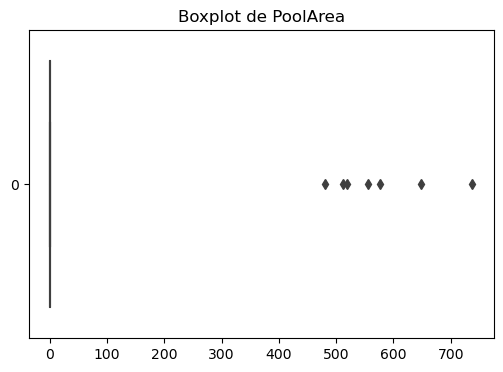

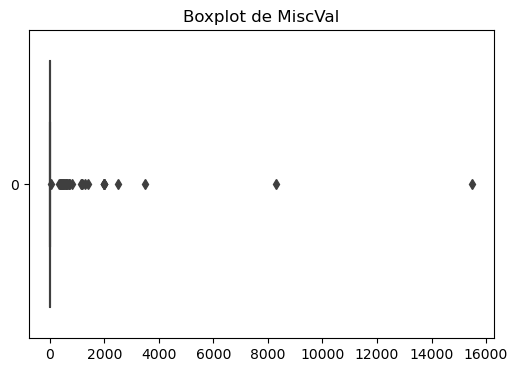

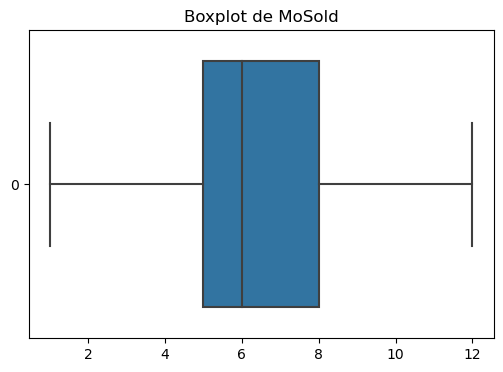

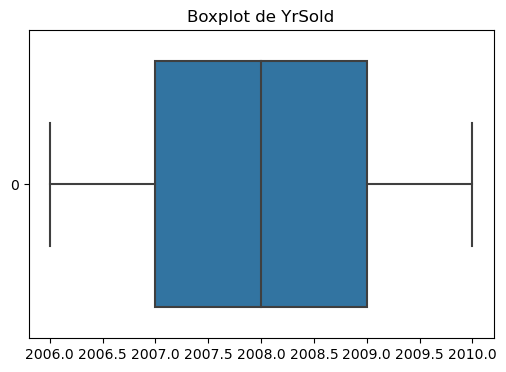

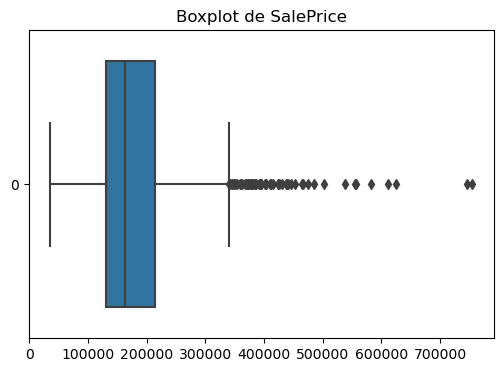

In [40]:
for columna in df_numerico.columns:
    plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura si es necesario
    sns.boxplot(data=df_numerico[columna], orient="h")  # Crear el boxplot horizontal
    plt.title(f'Boxplot de {columna}')  # Título del gráfico
    plt.show()  # Mostrar el gráfico

### Paso 1: Crear un límite para eliminar los datos nulos, mostrar las variables que harán eliminación a sus nulos y mostrar los conteos antes, eliminar los datos nulos y mostrar los conteos de nuevo.

### Paso 2: Si existen nulos aún, dependiendo de la gráficas anteriores, determinar si hay que imputar por medio de la moda, la mediana o la media; realizar la imputación.

### Paso 3: Analizar los datos numéricos, determinar si hay anomalías y utilizar el rango intercuartílico para tratarlos, mostrar gráficos antes y después del tratamiento, debe verse si la distribución se vio afectada.

### Paso 4: En base a la exploración previa (paso 3 del análisis y exploración), determinar si alguna columna puede ser categorizada y realizar la categorización.

### Paso 5: De las columnas categorizadas, buscar si hay inconsistencias, en caso de que las haya, hay que mostrarlas y tratarlas.

## Manipulación y preparación de los datos.

### Paso 1: Mostrar la matriz de correlación de nuevo, identificar las columnas que más esté correlacionadas con "SalePrice", mostrar numéricamente las 10 variables que estén correlacionadas más fuertemente a la variable objetivo.

### Paso 2: Responder las preguntas.
1. ¿Con las variables numéricas que se tienen es suficiente para predecir la variable objetivo?
2. ¿Alguna de las variables categóricas servirá realmente para determinar la variable objetivo?


### Paso 3: Conversión de categórico a numérico. Hay que seleccionar las columnas que ya fueron categorizadas y hay que sacar su valor con un "one-hot encoder", luego hay que agregarlas al dataset y eliminar su columna categórica. Hay que mostrar de nuevo las correlaciones para ver si cambiaron las variables más correlacionadas con la variable objetivo.

### Paso 4: Conversión de las demás columnas objeto a numérico. Para ello se va a requerir un encoder más avanzado, usar la clase "MultiColumnLabelEncoder" vista en clase, el dataframe resultante va a ser la versión consolidada y completamente numérica.

### Paso 5: Mostrar la información del nuevo dataframe (numérico), mostrar que no contenga nulos, que todos los datos sean de tipo int/float/uint. Mostrar de nuevo las correlaciones, filtrar para que solo muestre las 10 más correlacionadas a la variable objetivo.

## Presentación del proyecto

### Paso 1: Crear un repositorio en GitHub.
### Paso 2: Subir el trabajo a ese repositorio y crear un archivo README.
### Paso 3: En el README, describir el trabajo, así como describir qué resulta de este proyecto.
### Paso 4: Volver público el repositorio, validar acceso desde fuera y guardar el enlace.
### Paso 5: Enviar el enlace y los demás archivos al profesor para su evaluación (a través de Teams).

## Conclusiones acerca del análisis exploratorio y del dataset en general.